# Breast Cancer data analysis
[Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Contents:
* [Data Preparation](#data-preparation)
* [Data Analysis](#data-analysis)
* [Data Visualization](#data-visualization)
* [Feature Selection](#feature-selection)
* [Classification Algorithms](#classification-algorithms)
    * [Logistic Regression](#logistic-regression)
    * [Decision Tree](#decision-tree)
    * [Support Vector Machines](#support-vector-machines)
    * [Random Forest](#random-forest)
* [Feature Extraction](#feature-extraction)

### Data Preparation <a class="anchor" id="data-preparation"></a>

In [56]:
import pandas as pd

In [57]:
x = pd.read_csv('data.csv', sep=',')
x.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
x.rename(index=str, inplace=True, columns={"concave points_se": "concave_points_se", "concave points_mean": "concave_points_mean", "concave points_worst": "concave_points_worst", "diagnosis": "diagnosis_text"})
x.reset_index(drop=True, inplace=True)

In [58]:
x['diagnosis'] = [1 if each=='M' else 0 for each in x.diagnosis_text]
y = x.diagnosis

### Data Analysis <a class="anchor" id="data-analysis"></a>

In [14]:
x[100:105]

,diagnosis_text,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
100,M,13.610,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,...,35.27,108.60,906.5,0.1265,0.19430,0.31690,0.11840,0.2651,0.07397,1
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,...,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382,0
102,B,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,...,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878,0
103,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,...,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490,0
104,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,...,23.31,74.22,402.8,0.1219,0.14860,0.07987,0.03203,0.2826,0.07552,0


In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
diagnosis_text             569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave_points_se          569 n

In [16]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
x.columns.values

array(['diagnosis_text', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype=object)

### Data Visualization <a class="anchor" id="data-visualization"></a>

In [18]:
x.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


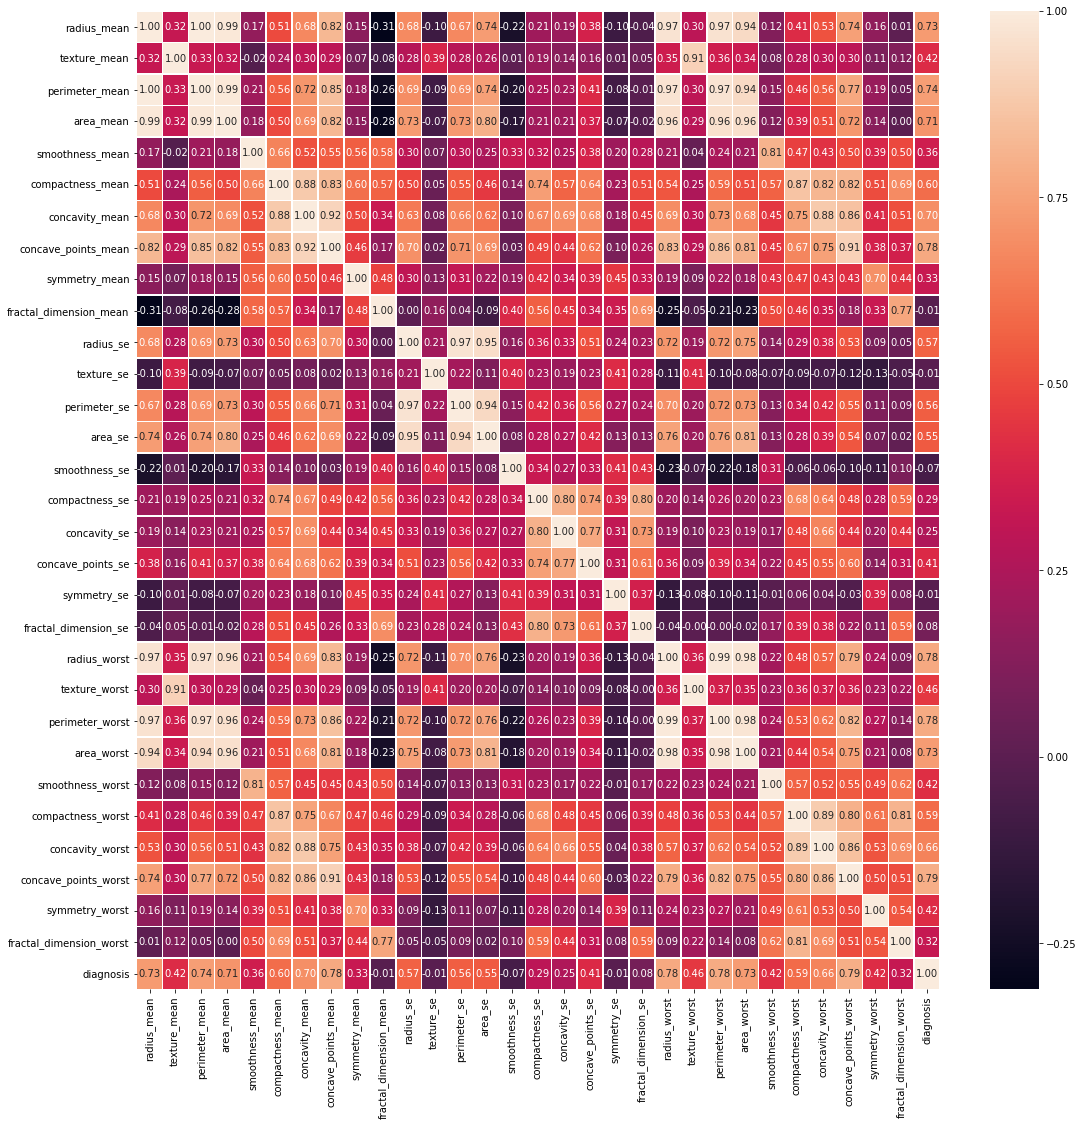

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax)
plt.show()

Select the variables with high correlation

In [20]:
diag = x.corr()['diagnosis'].copy()
diag.drop(['diagnosis'], inplace=True)
diag.sort_values(axis=0, ascending=False, inplace=True)

In [21]:
diag[:5]

concave_points_worst    0.793566
perimeter_worst         0.782914
concave_points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
Name: diagnosis, dtype: float64

#### Violin and swarm plot

In [ ]:
#data = pd.melt(x, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=x.drop(['diagnosis'], axis=1), split=True, inner="quart")
plt.xticks(rotation=90)

#### Line plots

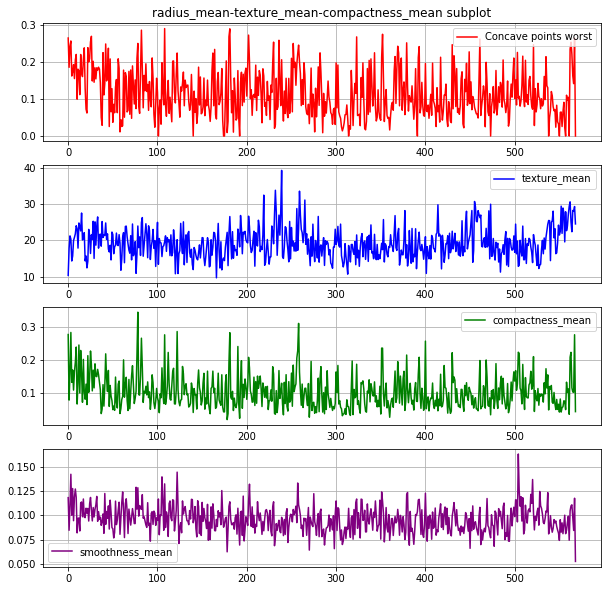

In [24]:
plt.subplots(figsize=(10, 10))

plt.subplot(4, 1, 1)
plt.title("radius_mean-texture_mean-compactness_mean subplot")
plt.plot(x.concave_points_worst, color="r", label="Concave points worst")
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(x.texture_mean, color="b", label="texture_mean")
plt.legend()
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(x.compactness_mean, color="g", label="compactness_mean")
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(x.smoothness_mean, color="purple", label="smoothness_mean")
plt.legend()
plt.grid()

plt.show()

#### Histograms

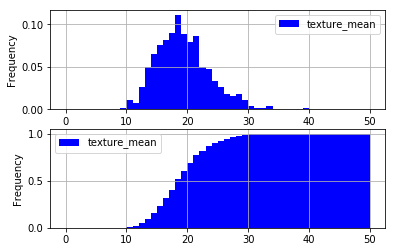

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1)
x.plot(kind="hist", bins=50, y='texture_mean', range=(0, 50), color='b', normed=True, grid=True, ax=axes[0])
x.plot(kind="hist", bins=50, y='texture_mean', range=(0, 50), color='b', normed=True, grid=True, ax=axes[1], cumulative=True)
plt.show()

Showing the histogram of the top 5 most and least correlated features

In [33]:
import numpy as np

features = [
    'concave_points_worst', 'fractal_dimension_se',
    'perimeter_worst', 'symmetry_se',
    'concave_points_mean', 'texture_se',
    'radius_worst', 'fractal_dimension_mean',
    'perimeter_mean', 'smoothness_se'
]

c:\users\zol\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


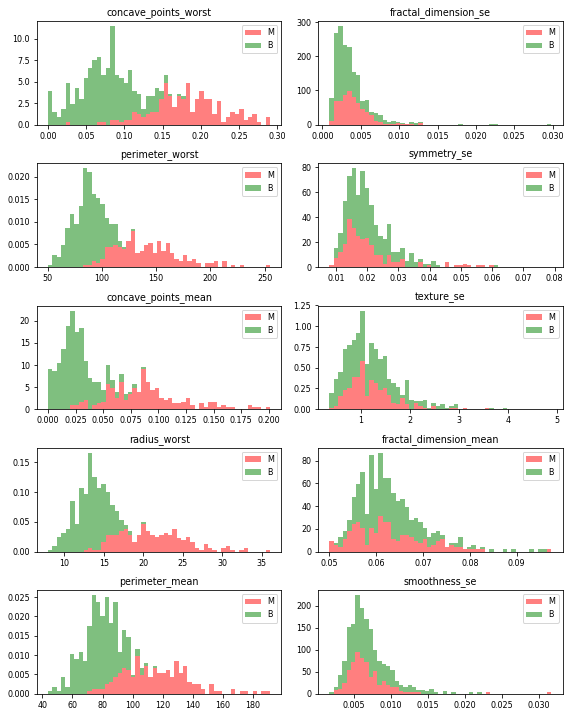

In [35]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth= (max(x[features[idx]]) - min(x[features[idx]]))/50
    ax.hist([
            x[x['diagnosis'] == 1][features[idx]],
            x[x['diagnosis'] == 0][features[idx]]
        ],
        bins=np.arange(min(x[features[idx]]), max(x[features[idx]]) + binwidth, binwidth),
        alpha=0.5,
        stacked=True,
        normed=True,
        label=['M', 'B'],
        color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features[idx])
plt.tight_layout()
plt.show()

#### Bar charts

In [27]:
def calculate_mean(dep):
    a_list = list(x.diagnosis_text.unique())
    a_dependent = []
    for i in a_list:
        xo = x[x.diagnosis_text == i]
        a_d = sum(xo[dep])/len(xo)
        a_dependent.append(a_d)

    return pd.DataFrame({
        "diagnosis": a_list,
        "output": a_dependent
    })

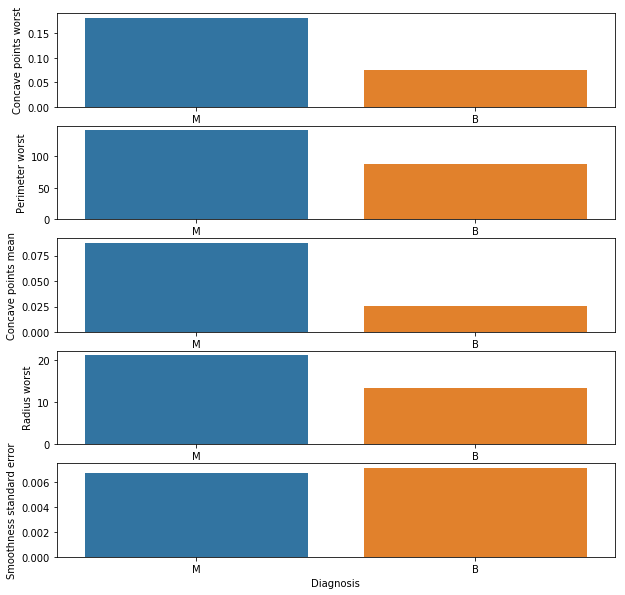

In [28]:
plt.subplots(figsize=(10, 10))
plt.title('Diagnosis vs top4 most and worst correlated variables')

plt.subplot(5, 1, 1)
output = calculate_mean('concave_points_worst')
sns.barplot(x=output['diagnosis'], y=output['output'])
plt.xticks(rotation= 360)
plt.ylabel('Concave points worst')

plt.subplot(5, 1, 2)
output = calculate_mean('perimeter_worst')
sns.barplot(x=output['diagnosis'], y=output['output'])
plt.xticks(rotation= 360)
plt.ylabel('Perimeter worst')

plt.subplot(5, 1, 3)
output = calculate_mean('concave_points_mean')
sns.barplot(x=output['diagnosis'], y=output['output'])
plt.xticks(rotation= 360)
plt.ylabel('Concave points mean')

plt.subplot(5, 1, 4)
output = calculate_mean('radius_worst')
sns.barplot(x=output['diagnosis'], y=output['output'])
plt.xticks(rotation= 360)
plt.xlabel('Diagnosis')
plt.ylabel('Radius worst')

plt.subplot(5, 1, 5)
output = calculate_mean('smoothness_se')
sns.barplot(x=output['diagnosis'], y=output['output'])
plt.xticks(rotation= 360)
plt.xlabel('Diagnosis')
plt.ylabel('Smoothness standard error')

plt.show()

#### Boxplot
Interpretation: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

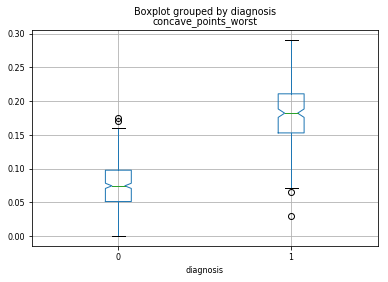

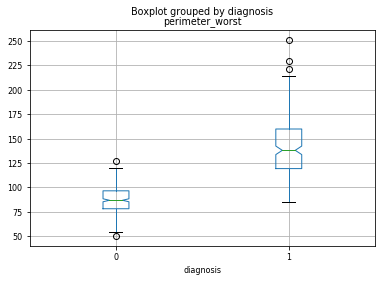

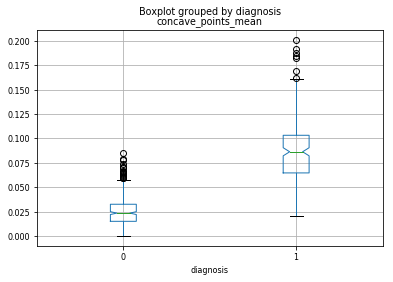

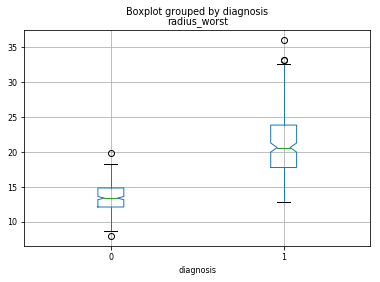

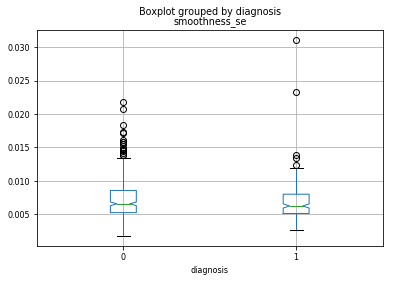

In [39]:
x.boxplot(column="concave_points_worst", by="diagnosis", notch=True)
x.boxplot(column="perimeter_worst", by="diagnosis", notch=True)
x.boxplot(column="concave_points_mean", by="diagnosis", notch=True)
x.boxplot(column="radius_worst", by="diagnosis", notch=True)
x.boxplot(column="smoothness_se", by="diagnosis", notch=True)

#### Joint plot

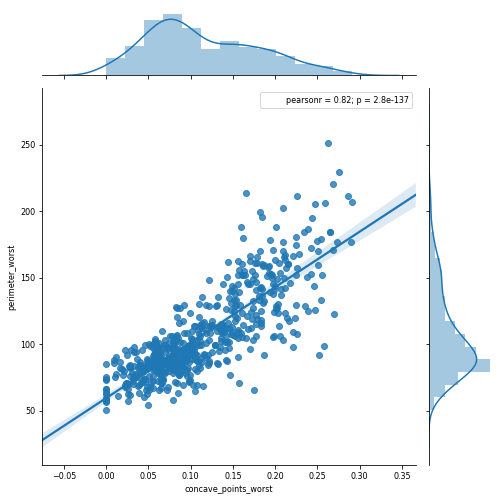

In [43]:
sns.jointplot(x.concave_points_worst, x.perimeter_worst, kind="reg", size=7)

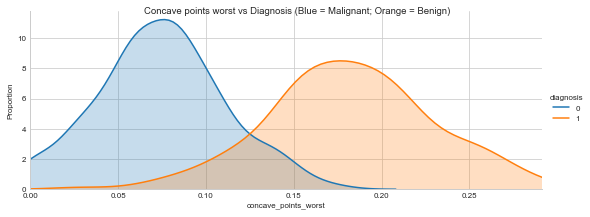

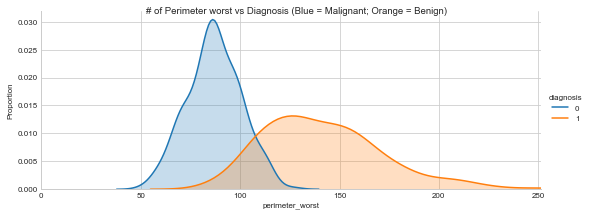

In [72]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(x, hue="diagnosis", aspect=2.5)
plotOne.map(sns.kdeplot, 'concave_points_worst', shade=True)
plotOne.set(xlim=(0, x['concave_points_worst'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('concave_points_worst', 'Proportion')
plotOne.fig.suptitle('Concave points worst vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show()

sns.set_style("whitegrid")
plotTwo = sns.FacetGrid(x, hue="diagnosis", aspect=2.5)
plotTwo.map(sns.kdeplot, 'perimeter_worst',shade= True)
plotTwo.set(xlim=(0, x['perimeter_worst'].max()))
plotTwo.add_legend()
plotTwo.set_axis_labels('perimeter_worst', 'Proportion')
plotTwo.fig.suptitle('# of Perimeter worst vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show()

### Feature selection <a class="anchor" id="feature-selection"></a>
1) No feature


Feature Correlation:



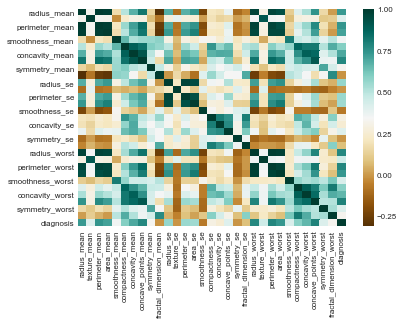

In [96]:
print("\nFeature Correlation:\n")
g = sns.heatmap(x.corr(), cmap="BrBG", annot=False)

X_train, X_test, Y_train, Y_test = train_test_split(x.drop(['diagnosis_text', 'diagnosis'], axis=1), y, test_size=0.2)

2) Retain correlated features


 Feature Names: 

 ['texture_mean' 'area_mean' 'symmetry_mean'] 


Feature Correlation:



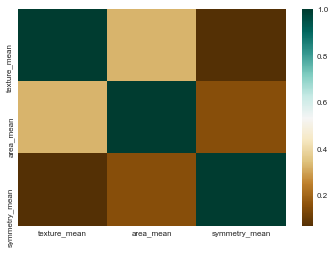

In [93]:
x2 = x.drop(['radius_mean','perimeter_mean',
 'smoothness_mean', 'compactness_mean', 'concavity_mean',
 'concave_points_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
 'smoothness_se', 'smoothness_se', 'concavity_se',
 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
 'radius_worst', 'perimeter_worst', 
 'smoothness_worst', 'compactness_worst', 
 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst','texture_worst', 'area_worst',
 'concavity_worst', 'diagnosis_text', 'diagnosis'], axis=1)
x2 = x2[x2.columns[:-1]]
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y, test_size=0.2)
print('\n Feature Names: \n\n', x2.columns.values, "\n")
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train2.corr(), cmap="BrBG", annot=False)

3) PCA


 Feature Names: 

 [0 1 2 3 4] 


Feature Correlation:



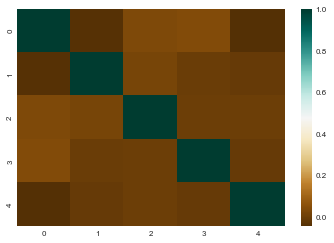

In [94]:
from sklearn.decomposition import PCA
x3=x.drop(['diagnosis_text', 'diagnosis'], axis=1)

variance_pct = 5
pca = PCA(n_components=variance_pct)
x_transformed = pca.fit_transform(x3, y)
x3pca = pd.DataFrame(x_transformed)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(x3pca, y, test_size=0.2)
print('\n Feature Names: \n\n', x3pca.columns.values, "\n")
#print('First Few Values, After PCA: \n\n,',X3pca.head(),'\n\n')
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train3.corr(), cmap="BrBG", annot=False)

In [97]:
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)
clf1.fit(X_train, Y_train)
clf2 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)
clf2.fit(X_train2, Y_train2)
clf3 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)
clf3.fit(X_train3, Y_train3)
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test, Y_test)))
print('Accuracy of Decision Tree classifier on reduced training set: {:.2f}'.format(clf2.score(X_train2, Y_train2)))
print('Accuracy of Decision Tree classifier on reduced test set: {:.2f}'.format(clf2.score(X_test2, Y_test2)))
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf3.score(X_train3, Y_train3)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf3.score(X_test3, Y_test3)))

Accuracy of Decision Tree classifier on original training set: 0.96
Accuracy of Decision Tree classifier on original test set: 0.89
Accuracy of Decision Tree classifier on reduced training set: 0.91
Accuracy of Decision Tree classifier on reduced test set: 0.89
Accuracy of Decision Tree classifier on PCA-transformed training set: 0.96
Accuracy of Decision Tree classifier on PCA-transformed test set: 0.93


In [110]:
feature_names1 = x.columns.values
feature_names2 = x2.columns.values
feature_names3 = x3pca.columns.values

def plot_decision_tree1(a,b):
    dot_data = tree.export_graphviz(a, out_file=None, 
                             feature_names=b,  
                             class_names=['Malignant','Benign'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    return dot_data
plot_decision_tree1(clf2, feature_names2)

'digraph Tree {\nnode [shape=box, style="rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="area_mean <= 696.25\\ngini = 0.465\\nsamples = 455\\nvalue = [288, 167]\\nclass = Malignant"] ;\n1 [label="texture_mean <= 19.61\\ngini = 0.223\\nsamples = 321\\nvalue = [280, 41]\\nclass = Malignant"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="symmetry_mean <= 0.209\\ngini = 0.081\\nsamples = 214\\nvalue = [205, 9]\\nclass = Malignant"] ;\n1 -> 2 ;\n3 [label="gini = 0.031\\nsamples = 192\\nvalue = [189, 3]\\nclass = Malignant"] ;\n2 -> 3 ;\n4 [label="gini = 0.397\\nsamples = 22\\nvalue = [16, 6]\\nclass = Malignant"] ;\n2 -> 4 ;\n5 [label="area_mean <= 551.4\\ngini = 0.419\\nsamples = 107\\nvalue = [75, 32]\\nclass = Malignant"] ;\n1 -> 5 ;\n6 [label="gini = 0.208\\nsamples = 68\\nvalue = [60, 8]\\nclass = Malignant"] ;\n5 -> 6 ;\n7 [label="gini = 0.473\\nsamples = 39\\nvalue = [15, 24]\\nclass = Benign"] ;\n5 -> 7 ;\n8 [label

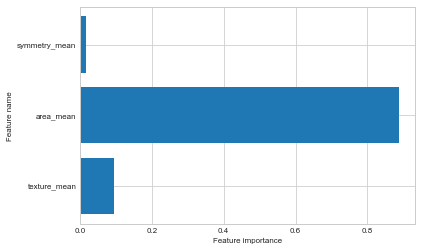

In [105]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
plot_feature_importances(clf2, feature_names2)

In [113]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'Malignant', 1: 'Benign'}

Accuracy of Random Forest Classifier on training data: 0.99
Accuracy of Random Forest Classifier on testing data: 0.97


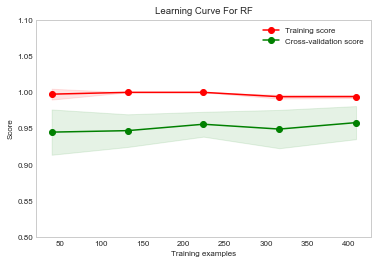

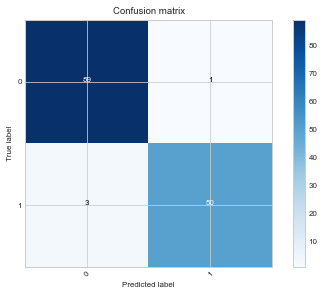

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import itertools

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x.drop(['diagnosis_text', 'diagnosis'], axis=1), y, random_state=0)
clf = RandomForestClassifier(max_features=8, random_state=0)
clf.fit(X_train1, Y_train1)
print('Accuracy of Random Forest Classifier on training data: {:.2f}'.format(clf.score(X_train1,Y_train1)))
print('Accuracy of Random Forest Classifier on testing data: {:.2f}'.format(clf.score(X_test1,Y_test1)))
model = clf
prediction = model.predict(X_test1)
cnf_matrix = confusion_matrix(Y_test1, prediction)
plt.show()

plot_learning_curve(model, 'Learning Curve For RF', X_train, Y_train, (0.80,1.1), 10)
plt.show()

plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
plt.show()

### Classification Algorithms <a class="anchor" id="classification-algorithms"></a>

#### Logistic Regression <a class="anchor" id="logistic-regression"></a>

In [59]:
import numpy as np

x_data = x.drop(["diagnosis", "diagnosis_text"], axis=1)
xs = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.15, random_state=42)
x_train=x_train.T
x_test=x_test.T
y_train=np.asarray(y_train).T
y_test=np.asarray(y_test).T

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (30, 483)
x_test:  (30, 86)
y_train:  (483,)
y_test:  (86,)


In [49]:
def he_initializer(dim):
    # He initializer
    w = np.random.randn(dim, 1)*np.sqrt(2/dim)
    b = 0.0
    return w, b

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_hat = sigmoid(z)
    loss = -y_train*np.log(y_hat) - (1-y_train)*np.log(1-y_hat)
    cost = (np.sum(loss))/x_train.shape[1]
    
    #backward propagation
    derivative_weight = (np.dot(x_train, ((y_hat - y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_hat - y_train)/x_train.shape[1]
    gradients = {
        "derivative_weight": derivative_weight,
        "derivative_bias": derivative_bias
    }
    
    return cost, gradients

In [50]:
def update(w, b, x_train, y_train, learning_rate, iteration):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        w-= gradients["derivative_weight"] * learning_rate
        b-= gradients["derivative_bias"] * learning_rate

        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" % (i, cost))

    parameters = {
        "weight": w,
        "bias": b
    }

    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients, cost_list

In [51]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

Cost after iteration 0: 0.697857
Cost after iteration 10: 0.488401
Cost after iteration 20: 0.397044
Cost after iteration 30: 0.343863
Cost after iteration 40: 0.308828
Cost after iteration 50: 0.283775
Cost after iteration 60: 0.264809
Cost after iteration 70: 0.249841
Cost after iteration 80: 0.237650
Cost after iteration 90: 0.227473
Cost after iteration 100: 0.218809
Cost after iteration 110: 0.211312
Cost after iteration 120: 0.204739
Cost after iteration 130: 0.198911
Cost after iteration 140: 0.193693
Cost after iteration 150: 0.188983
Cost after iteration 160: 0.184701
Cost after iteration 170: 0.180785
Cost after iteration 180: 0.177182
Cost after iteration 190: 0.173852


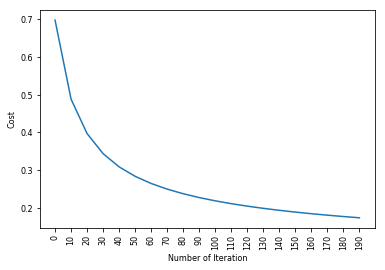

Test accuracy: 94.18604651162791 %


In [52]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dim =  x_train.shape[0]
    w, b = he_initializer(dim)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)[0]
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test.astype('float'))) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 1, num_iterations = 200)

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train.T, y_train.T)
print("test accuracy {}".format(lr.score(x_test.T, y_test.T)))

test accuracy 0.9651162790697675


In [61]:
train, test = train_test_split(x, test_size = 0.3)

prediction_var = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']
train_X = train[prediction_var]
train_y = train['diagnosis']
test_X = test[prediction_var]
test_y = test['diagnosis']

#### Random Forest <a class="anchor" id="random-forest"></a>

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

In [63]:
metrics.accuracy_score(prediction, test_y)

0.9415204678362573

#### Support vector machine <a class="anchor" id="support-vector-machine"></a>

In [64]:
from sklearn import svm
from sklearn import metrics

model = svm.SVC()
model.fit(x_train.T, y_train.T)
prediction = model.predict(x_test.T)
metrics.accuracy_score(prediction, y_test.T)

0.9534883720930233

#### Decision Tree <a class="anchor" id="decision-tree"></a>

In [65]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train.T, y_train.T)
prediction = model.predict(x_test.T)
metrics.accuracy_score(prediction, y_test.T)

0.9069767441860465

### Correlation
#### Pearson Correlation

In [66]:
p1 = x.loc[:,["area_mean", "radius_mean"]].corr(method = "pearson")
p2 = x.radius_mean.cov(x.area_mean)/(x.radius_mean.std()*x.area_mean.std())
print('Pearson correlation:')
print(p1)
print('Pearson correlation:', p2)

Pearson correlation:
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation: 0.9873571700566125


#### Spearman's Rank Correlation

In [67]:
ranked_data = x.rank()
spearman_corr = ranked_data.loc[:,["area_mean", "radius_mean"]].corr(method = "pearson")
print("Spearman's correlation:")
print(spearman_corr)

Spearman's correlation:
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000
